<a href="https://colab.research.google.com/github/EnioluwaBolaji/COVID-PROJECT/blob/main/A_B_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



import warnings
warnings.filterwarnings ("ignore")

# Set visualization style
sns.set(style="whitegrid")

In [5]:
#Read the data
df = pd.read_csv("cookie_cats.csv")

# **Data Exploration**

In [6]:
#Check first few observations
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [7]:
#Check for duplicates in user_id
df.duplicated(subset= 'userid').sum()

0

In [8]:
# Check for missing values
df.isnull().sum()

# Get basic statistics
df.describe()

# Check the distribution of the version column
df['version'].value_counts()


version
gate_40    45489
gate_30    44700
Name: count, dtype: int64

In [9]:
# total distinct players
df["userid"].nunique()

90189

In [10]:
# There are two groups (gate_30 and 70) grouped into A and B
# Count total numbers of each group
df.groupby("version")[["userid"]].nunique()

,userid
version,
gate_30,44700
gate_40,45489


#**Data Description**

**We have a total of 90,189 players**


**1.   userid - a unique number that identifies each player**

**2.   version - whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40).**

**3.   sum_gamerounds - the number of game rounds played by the player during the first 14 days after install.**

**4.   retention_1 - did the player come back and play 1 day after installing?**


**5.   retention_7 - did the player come back and play 7 days after installing?**


**When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40.**


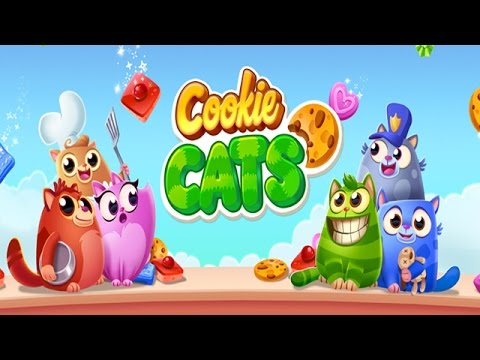

In [23]:
from IPython.display import YouTubeVideo
YouTubeVideo('LLVD72FuRlw')

In [11]:
df.columns

Index(['userid', 'version', 'sum_gamerounds', 'retention_1', 'retention_7'], dtype='object')

# Game rounds distribution

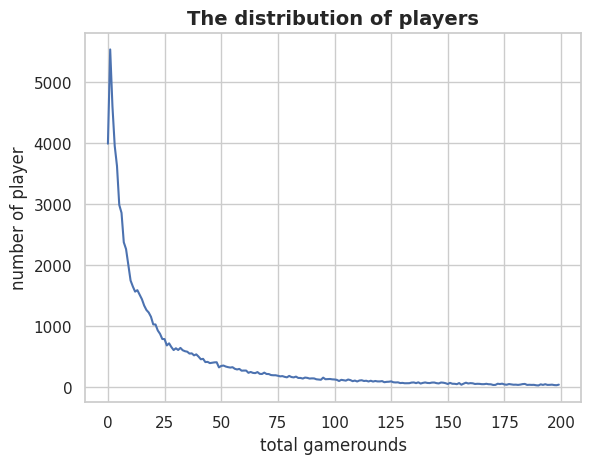

In [12]:
# The distribution of game rounds

# Counting the number of players for each number of gamerounds
plot_df = df.groupby("sum_gamerounds")["userid"].count()

# Plotting the distribution of players that played 0 to 200 game rounds
ax = plot_df.head(200).plot()
plt.title("The distribution of players", fontweight="bold", size=14)
plt.xlabel("total gamerounds", size=12)
plt.ylabel("number of player", size=12)
plt.show()

In [22]:
df[df["sum_gamerounds"]== 200]["userid"].count()

49

In [14]:
df[df["sum_gamerounds"]== 0]["userid"].count()

3994

# **Observations**

1. **The plot indicates a significant number of players who installed the game but never played it, as shown by a spike at 0 game rounds.This suggests that a substantial portion of the player base did not engage with the game after installation.**

2. **As the total number of game rounds increases, the number of users decreases. While the game attracted a large initial player base, player retention and consistent engagement declined over time.**

3. **The plot reveals an inverse relationship between the total number of game rounds played and the number of users. As the number of game rounds increases, the number of users decreases, indicating that only a smaller subset of players actively participated for an extended period, while the majority played relatively few rounds.**

**Notably, 3,994 players never played the game after installing it, and only 49 players played 200 times.**








# **Players Retention Analysis**

**Analyzing 1-day and 7-day retention rates for each A/B test group.**

In [15]:
# Calculate retention rates for both groups
retention_1 = df.groupby('version')['retention_1'].mean()
retention_7 = df.groupby('version')['retention_7'].mean()

print("Retention 1-day rates:")
print(retention_1)
print("\nRetention 7-day rates:")
print(retention_7)


Retention 1-day rates:
version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

Retention 7-day rates:
version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64


In [16]:
df_retention = df[["retention_1","retention_7"]].mean()*100
print(f"1-day retention ratio: {round(df_retention[0],2)}% \
      \n7-days retention ratio: {round(df_retention[1],2)}%")

1-day retention ratio: 44.52%       
7-days retention ratio: 18.61%


**44.52% come back one day after installing the game. 18.61% percent of the players come back 7 days after installing the game.**

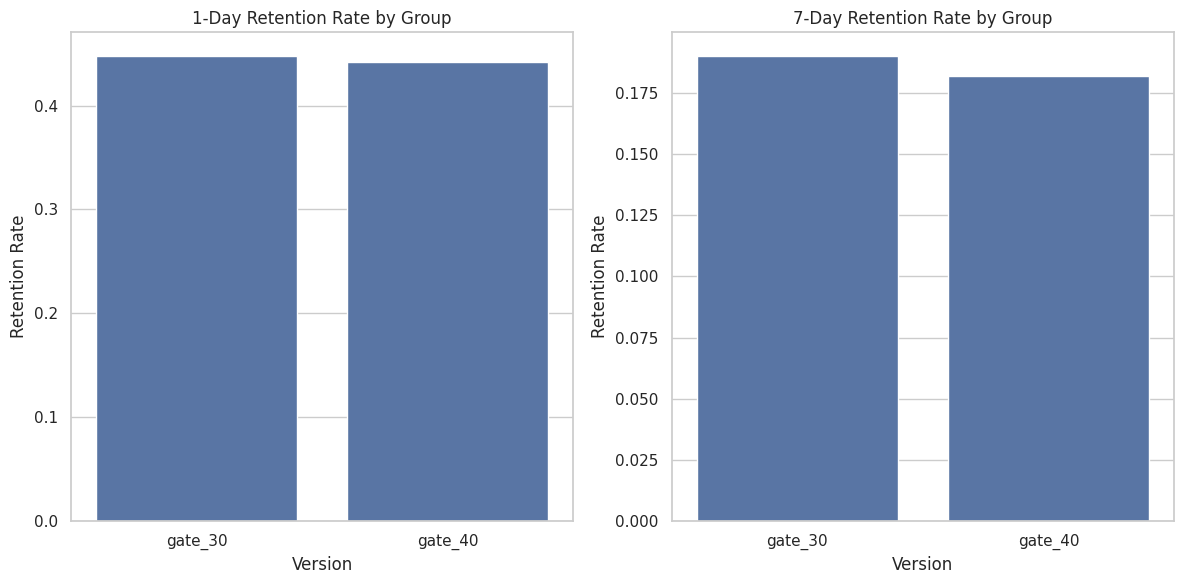

In [17]:
# Plot retention rates
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 1-day retention
sns.barplot(x=retention_1.index, y=retention_1.values, ax=ax[0])
ax[0].set_title('1-Day Retention Rate by Group')
ax[0].set_xlabel('Version')
ax[0].set_ylabel('Retention Rate')

# 7-day retention
sns.barplot(x=retention_7.index, y=retention_7.values, ax=ax[1])
ax[1].set_title('7-Day Retention Rate by Group')
ax[1].set_xlabel('Version')
ax[1].set_ylabel('Retention Rate')

plt.tight_layout()
plt.show()


**Higher 1-day retention rates make it easier to retain players and grow a large player base. A 0.6% decrease in returning players randomized to the 40-round gate for 1-day could be significant. With millions of users, that 0.6% could translate into additional paying customers and/or ad revenue.**

- **There was a slight decrease in 1-day retention when the gate was moved to level 40 (44.2%) compared to the control group at level 30 (44.8%).**
- **Similarly, 7-day retention decreased when the gate was moved to level 40 (18.2%) compared to the control group at level 30 (19.8%).**

# **Independent T-testing**

**Using the independent t-test (also known as a two-sample t-test) to
compare the means of day 1 and day 7 retention rates to determine if there is a significant difference between them.**

In [18]:
# 1-day retention t-test
t_test_1 = stats.ttest_ind(
    df[df['version'] == 'gate_30']['retention_1'],
    df[df['version'] == 'gate_40']['retention_1']
)

# 7-day retention t-test
t_test_7 = stats.ttest_ind(
    df[df['version'] == 'gate_30']['retention_7'],
    df[df['version'] == 'gate_40']['retention_7']
)

print("1-day retention t-test results:", t_test_1)
print("7-day retention t-test results:", t_test_7)


1-day retention t-test results: TtestResult(statistic=1.7840979256519656, pvalue=0.07441111525563184, df=90187.0)
7-day retention t-test results: TtestResult(statistic=3.1644994996802778, pvalue=0.0015540151201088365, df=90187.0)


# **Average gamerounds for each level**

Average game rounds played by group:
version
gate_30    52.456264
gate_40    51.298776
Name: sum_gamerounds, dtype: float64


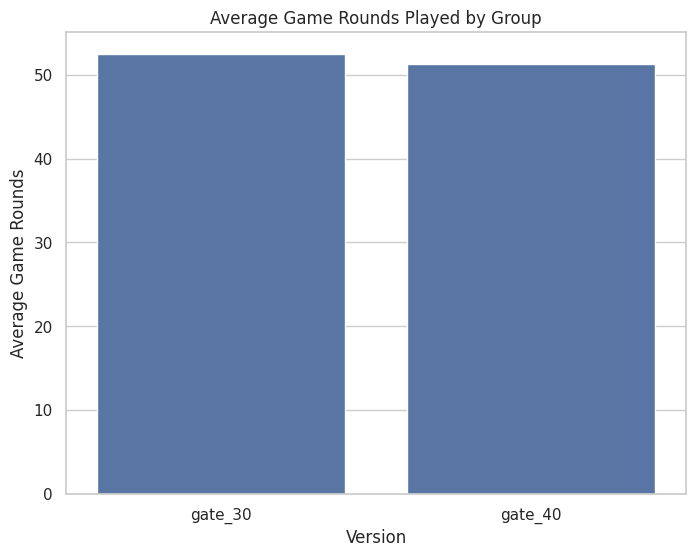

In [19]:
# Calculate average game rounds for each group
avg_game_rounds = df.groupby('version')['sum_gamerounds'].mean()

print("Average game rounds played by group:")
print(avg_game_rounds)

# Plot average game rounds
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_game_rounds.index, y=avg_game_rounds.values)
plt.title('Average Game Rounds Played by Group')
plt.xlabel('Version')
plt.ylabel('Average Game Rounds')
plt.show()

- **gate_30 had more player engagement than gate_40**

In [20]:
# Summary of findings
print("Summary of Findings:")
print(f"1-Day Retention Rate: \n{retention_1}")
print(f"\n7-Day Retention Rate: \n{retention_7}")
print(f"\nAverage Game Rounds: \n{avg_game_rounds}")

print("\nStatistical Test Results:")
print(f"1-Day Retention t-test: {t_test_1}")
print(f"7-Day Retention t-test: {t_test_7}")

Summary of Findings:
1-Day Retention Rate: 
version
gate_30    0.448188
gate_40    0.442283
Name: retention_1, dtype: float64

7-Day Retention Rate: 
version
gate_30    0.190201
gate_40    0.182000
Name: retention_7, dtype: float64

Average Game Rounds: 
version
gate_30    52.456264
gate_40    51.298776
Name: sum_gamerounds, dtype: float64

Statistical Test Results:
1-Day Retention t-test: TtestResult(statistic=1.7840979256519656, pvalue=0.07441111525563184, df=90187.0)
7-Day Retention t-test: TtestResult(statistic=3.1644994996802778, pvalue=0.0015540151201088365, df=90187.0)


In [21]:
df_retention_ab = df.groupby("version").agg({"userid":"count", "retention_1":"mean","retention_7":"mean", "sum_gamerounds":"sum"})
df_retention_ab

,userid,retention_1,retention_7,sum_gamerounds
version,,,,
gate_30,44700,0.448188,0.190201,2344795
gate_40,45489,0.442283,0.182000,2333530


**Once more, there's been a decline in 7-day retention following the shift of the gate to level 40, registering at 18.2%, contrasting with the control group's 19.8% when the gate was at level 30.**

**Though seemingly minor, even slight alterations in retention can yield significant repercussions. While the observed disparity in the data is evident, how confident can we be in level 40 gate?**

# **Bootstrapping For Testing**

**Definition**

**Utilizing bootstrapping for A/B testing. Bootstrapping involves resampling sample data to infer about a population, as the true error in a sample statistic against its population value is unknown. In bootstrap-resamples, the 'population' is the sample, making the quality of inference measurable.**








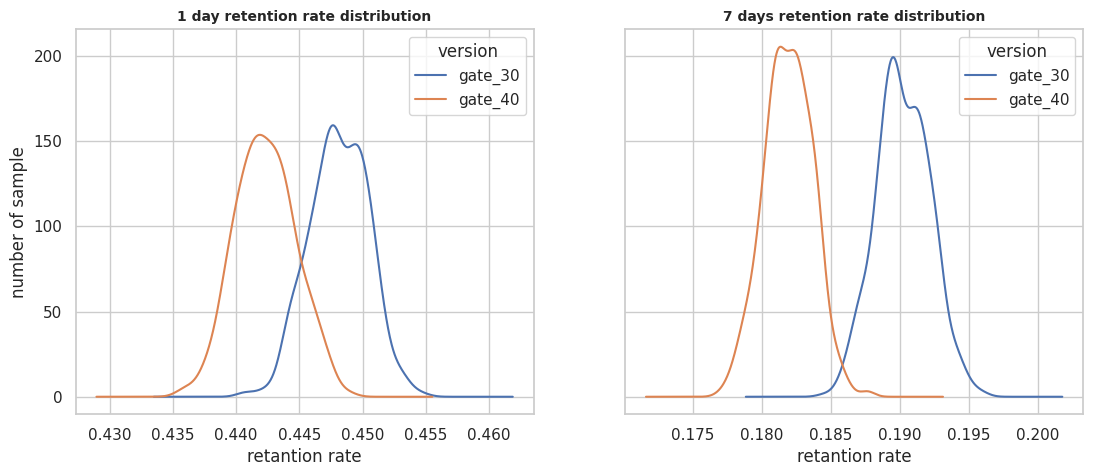

In [25]:
# Creating an list with bootstrapped means for each A/B group
boot_1d = []
boot_7d = []
for i in range(500):
    boot_mean_1 = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_mean_7 = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_1d.append(boot_mean_1)
    boot_7d.append(boot_mean_7)

# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
boot_7d = pd.DataFrame(boot_7d)

# Kernel Density Estimate plot of the bootstrap distributions
fig, (ax1,ax2) = plt.subplots(1, 2, sharey=True, figsize=(13,5))

boot_1d.plot.kde(ax=ax1)
ax1.set_xlabel("retantion rate",size=12)
ax1.set_ylabel("number of sample",size=12)
ax1.set_title("1 day retention rate distribution", fontweight="bold",size=10)

boot_7d.plot.kde(ax=ax2)
ax2.set_xlabel("retantion rate",size=12)
ax2.set_title("7 days retention rate distribution", fontweight="bold",size=10)
plt.show()

**The distributions depict bootstrap uncertainty regarding the underlying 1-day and 7-day retention for the two A/B groups. Upon visualization, there appears to be some indication of a difference, although slight.**

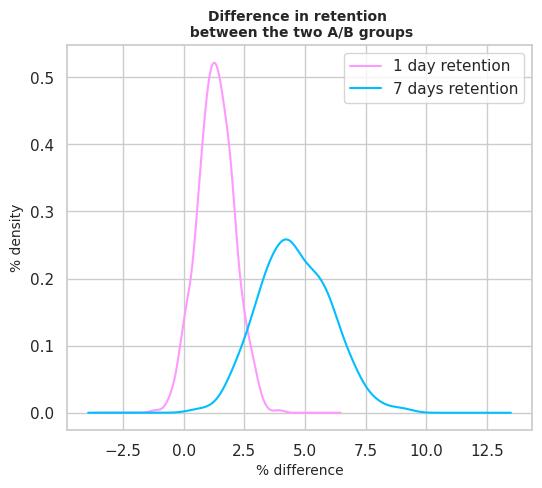

In [27]:
# Adding a column with the % difference between the two A/B groups
boot_1d['diff'] = ((boot_1d['gate_30'] - boot_1d['gate_40']) / boot_1d['gate_40'] * 100)
boot_7d['diff'] = ((boot_7d['gate_30'] - boot_7d['gate_40']) / boot_7d['gate_40'] * 100)

# Ploting the bootstrap % difference
fig, (ax1) = plt.subplots(1, 1,figsize=(6,5))

boot_1d['diff'].plot.kde(ax=ax1, c="#ff99ff", label = "1 day retention")
boot_7d['diff'].plot.kde(ax=ax1, c= "#00bfff", label = "7 days retention")
ax1.set_xlabel("% difference",size=10)
ax1.set_ylabel("% density",size=10)
ax1.set_title("Difference in retention \n between the two A/B groups", fontweight="bold", size=10)
plt.legend()
plt.show()

**From these charts, it's evident that the most probable percentage difference falls within the range of 1% to 2% for 1-day retention, while for 7-day retention, it lies between 2% and 5%. Additionally, the majority of the distribution is skewed above 0%, indicating a preference for a gate at level 30.**

In [28]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30
prob_1 = (boot_1d['diff']>0).sum()/len(boot_1d['diff'])

# Calculating the probability that 7-days retention is greater when the gate is at level 30
prob_7 = (boot_7d['diff']>0).sum()/len(boot_7d['diff'])

# Pretty printing the probability
print(f"The probability that 1-day retention is greater when the gate is at level 30: {round(prob_1,2)*100}% \
      \nThe probability that 7-days retention is greater when the gate is at level 30: {(prob_7)*100}% ")

The probability that 1-day retention is greater when the gate is at level 30: 96.0%       
The probability that 7-days retention is greater when the gate is at level 30: 100.0% 


**The bootstrap analysis indicates a robust 99.8% likelihood that 7-day retention is greater when the gate is situated at level 30 compared to level 40.**


# **Recommendation**

- **Consequently, the recommendation is clear: to maintain high retention rates, both for 1-day and 7-day periods, it's advisable not to relocate the gate from level 30 to level 40. While there are alternative metrics to consider, such as the volume of game rounds played or the extent of in-game purchases across the two A/B groups, retention remains among the most critical metrics to prioritize.**

- **The implementation of gameplay obstacles adversely affected player retention. It's imperative to fine-tune the positioning and configuration of these obstacles to mitigate their adverse impact.**

- **Specific barrier thresholds exhibited substantial declines in player interaction metrics, such as session length and progression. Delve deeper into these thresholds and consider alternative barrier configurations.**

- **Propose conducting A/B tests on various barrier designs or optional barrier functionalities to enhance the player journey and boost revenue streams while minimizing retention risks.**

- **Consistently monitor player behaviors and engagement patterns to iteratively enhance the barrier implementation and other game elements.**